In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from scipy.stats import gaussian_kde
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import SelectFromModel

## Table Of Contents

<ol>
    <li><a href="#objective"><h4>Objective</h4></a></li>
    <li><a href="#why"><h4>Why is Churn Rate Important</h4></a></li>
    <li><a href="#thedata"><h4>The Data</h4></a></li>
    <li><a href="#Summary"><h4>Summary of Numerical Values</h4></a></li>
    <li><a href="#EDA"><h4>Explaratroty Data Analysis</h4></a></li>
    <li><a href="#EDA"><h4>Churned Customers</h4></a></li>
    <li><a href="#objective"><h4>Objective</h4></a></li>
    <li><a href="#objective"><h4>Objective</h4></a></li>
    <li><a href="#objective"><h4>Objective</h4></a></li>
</ol>
<a id = "objective"></a>

## Objective

<blockquote> 
Use a decision tree model to predict customer churn (the percentage of customers that stopped using a company’s product or service during a certain time frame).
<a id = "why"></a>
<blockquote>

## Why is Churn Rate important

<blockquote>
With subsctiption based businesses, customer retention is important, as it directly affects the profitability, it has a impact on how a business grows, whether customers are moving to nearest competitor. So this will have an influence on whether the business is growing, the rate they are losing or gaining customers is a great focus for businesses.
</blockquote>

In [77]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [78]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
df.shape

(7043, 21)

## The Data
<a id = "thedata"></a>
<blockquote>
We have a Data set of 7043 customers, which consist of 21 rows, including customerID, gender, SeniorCitizen, Partner, Dependents,tenure, PhoneService, MultipleLines, InternetService,OnlineSecurity', OnlineBackup, DeviceProtection, TechSupport,StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges and the Churn. We want to further investigate as to which of these features affects the rate at which customers churn, the insights gained will attempt to descrease the churn rate and help the business focus on key areas to imporve business processes.
</blockquote>

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [81]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0.0)
df['TotalCharges'] = df.TotalCharges.astype(float)


## Summary of Numerical Values
<a id = "Summary"></a>
<blockquote>
<b>Numerical Values -</b> Included within the numerical values were the Tenure,Monthly Charges, Senior Citizenship. In order to investigate the Skewness, which showed that the distribution of Senior Citizens was not symmetrical, the Kurtosis helped us determine whether the distribuiton was very narrow of peaked. 
    <ul>
        <li><b>Senior Citizen-</b> There were no further insights we could gather from the sernior citizen, the Kurtosis and Skewness, showed us that it peaks and not symmetrical, thus we have decided to treat it as a artificat.</li>
        <li><b>Tenure-</b> The tenure is measured in months, the longest subscription is 72 months, with the minimum being 0. On Average the subscription is 32months, a pointto investigate would be at which month is the average likely to churn.</li>
        <li><b>MonthlyCharges- </b> Looking further into the monthly charges, the highest subscriber pays \$188.75, the lowest being $18.25, the lowest has a hight possibility they are using only phone services.</li>
        <li><b>Total Charges -</b> The total chages is a accumulation of how much each customer is paying, the maximum could be that the person with the longest subsctription and highest monthly charges, we can no deduce much at this stage. </li>
    
    
</blockquote>

In [82]:
data_summary = df.describe()
data_summary.loc['skewness'] = df.skew()
data_summary.loc['kurtosis'] = df.kurtosis()
data_summary

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000
skewness,1.833633,0.239540,-0.220524,0.963235
kurtosis,1.362596,-1.387372,-1.257260,-0.228580


In [110]:
df.astype({'TotalCharges': 'float64'}).dtypes
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0.0)

<h1>Exploratory Data Analysis</h1>
<a id = "EDA"></a>

### Churned Customers

<blockquote>
Out of the 7043 Customers, there were 1869 customers who churned, this is a loss of over 26% of the customer base.
</blockquote>



No     5174
Yes    1869
Name: Churn, dtype: int64


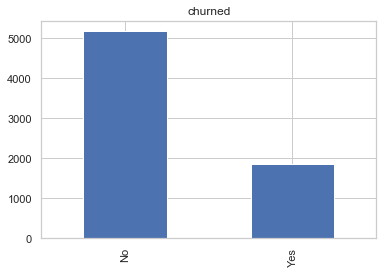

In [111]:
df.Churn.value_counts().plot('bar').set_title('churned')
print(df.Churn.value_counts())

## Numerical Values vs Churn

In [112]:
data = pd.get_dummies(df, columns=['Churn'])

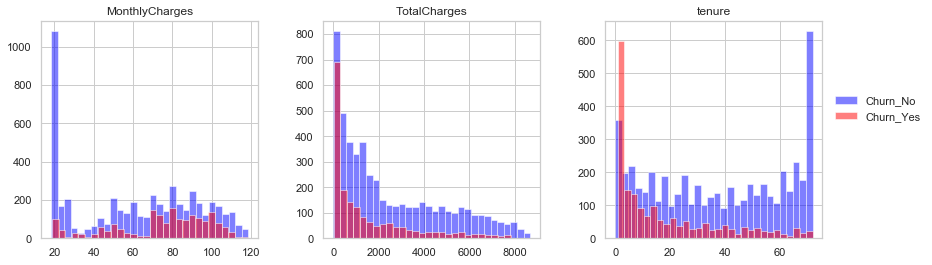

In [113]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == "No"][series].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][series].hist(bins=30, color="red", alpha=0.5, ax=ax)
plt.legend(labels =['Churn_No', 'Churn_Yes'], frameon=False, bbox_to_anchor=(1.5,0.7))
plt.show()

### Visualizing the numerical values

<blockquote>
<b>Numerical Values -</b> Included within the numerical values we wanted to visualize were the Tenure,Monthly Charges and Totalcharges: 
    <ul>
        <li><b>Tenure-</b>People were likely to churn in the beginning of their subscription, this could be because the company has a  30 day free  trial, or they clients were not happy with the tterms and conditions that were previously offered. </li>
        <li><b>MonthlyCharges- </b> From the graph, we examined the monthlycharges, people were likely to churn at the median, the affect was no consistent, there is hardly a pattern or major influence made by the monthlycharges.</li>
        <li><b>Total Charges -</b>Seing that most subscirbers churned in the first month, the chacne of the total charges being 0 are high, this adds on to the fact that maybe there is a 30 day free trial, which people are allowed to access certain services cost free.</li>
    
    
</blockquote>

## Outliers

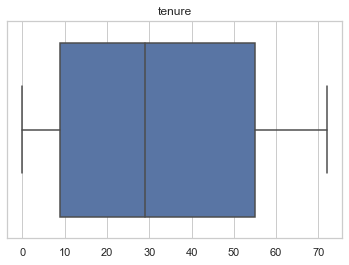

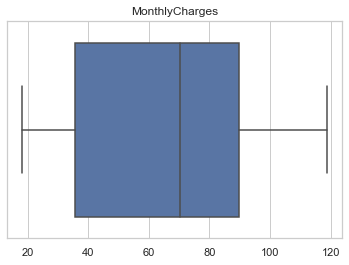

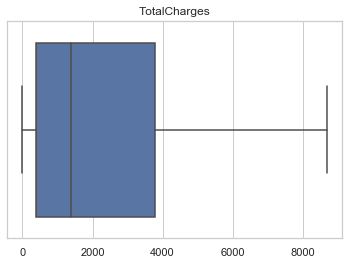

In [87]:
for i in series:
    sns.set(style="whitegrid")
    ax = sns.boxplot(data= data, x=[i])
    plt.title(i)
    plt.show()

### Checking for Outliers
<blockquote>
<b>Numerical Values -</b> Taking a closer look at the Monthly charges, TotalCharges and Tenure, there are no outliers that might affect our data for predcition analysis.
    </blockquote>

## Visualizing the catergorical Values

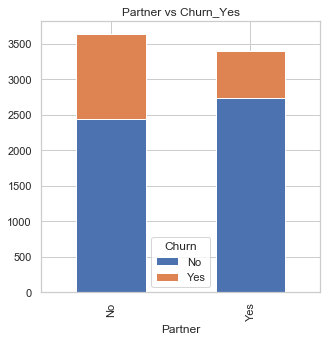

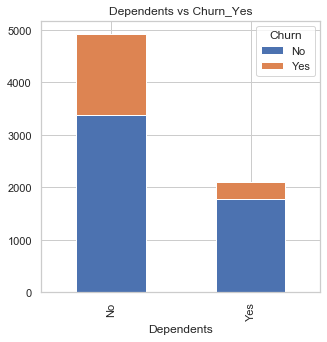

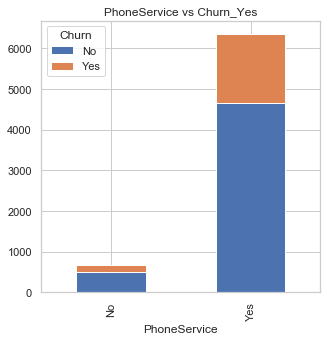

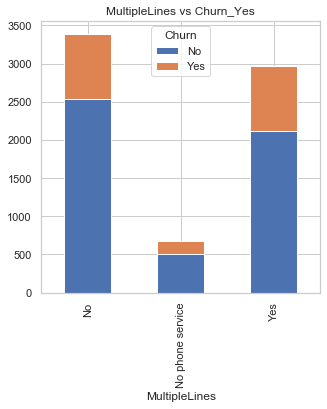

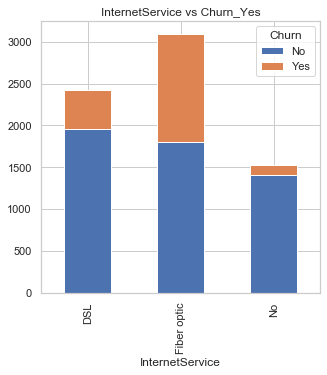

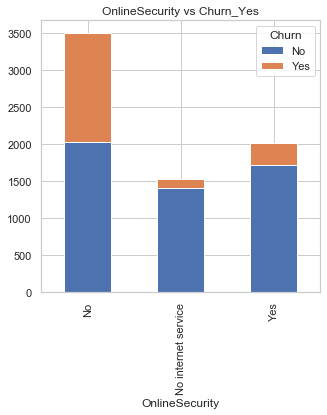

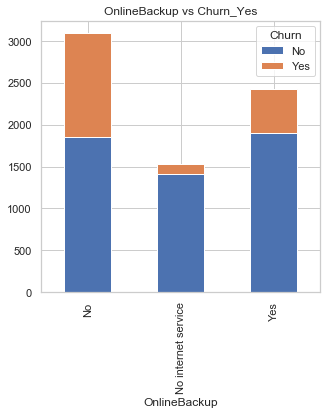

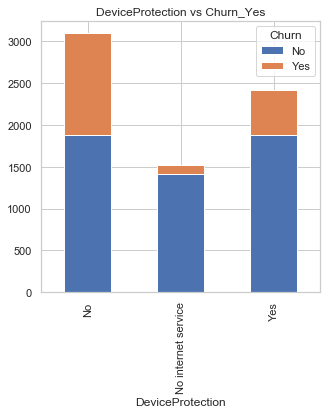

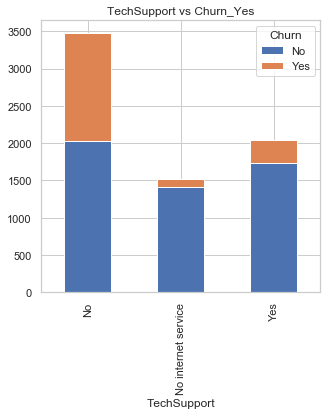

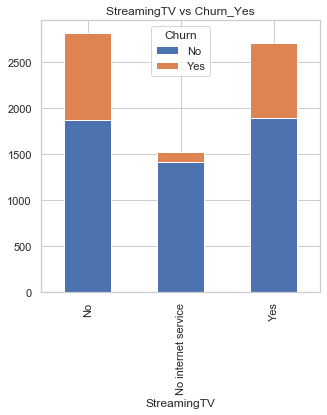

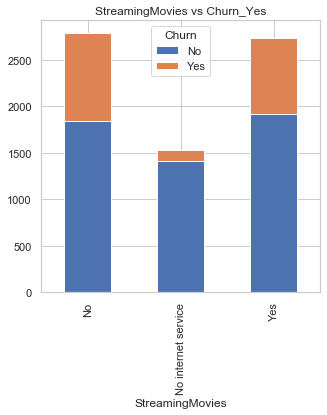

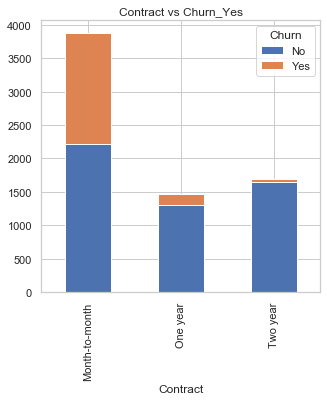

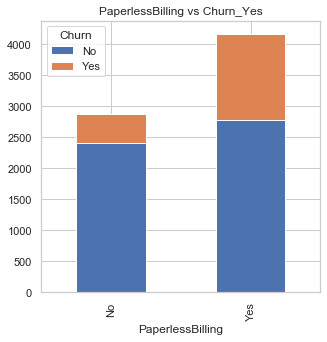

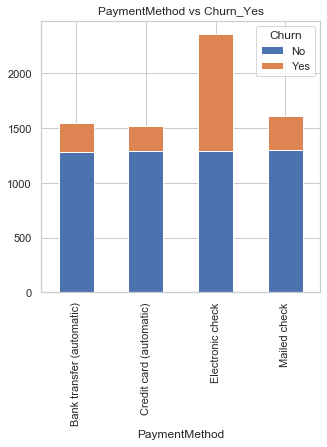

In [88]:
lst = ['Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

for i in lst:
    df.groupby([i, "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
    plt.title('{} vs Churn_Yes'.format(i))
    plt.show()

# Categorical Interpretation
<blockquote>
<b>Categorical -</b> Included within the numerical values we wanted to visualize were the Tenure,Monthly Charges and Totalcharges: 
    <ul>
        <li><b>Partner- </b> </li>
        <li><b>Dependents-</b></li>
        <li><b>PhoneService-</b> </li>
        <li><b>MultipleLines-</b></li>
        <li><b>InternetService-</b></li>
        <li><b>OnlineSecurity-</b></li>
        <li><b>OnlineBackup-</b></li>
        <li><b>DeviceProtection-</b></li>
        <li><b>TechSupport-</b></li>
        <li><b>StreamingTV-</b></li>
        <li><b>StreamingMovies-</b></li>
        <li><b>Contract-</b></li>
        <li><b>PaperlessBilling-</b></li>
        <li><b>PaymentMethod-</b></li>

</blockquote>
  

In [89]:
dummying = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                                       'PaymentMethod','Contract', 'PaperlessBilling','Churn']
new_data = pd.get_dummies(df, columns=dummying)

In [90]:
# new_data['PhoneService'] = new_data['PhoneService'].map({'Yes':1,'No':0})
# new_data['MultipleLines'] = new_data['MultipleLines'].map({'Yes':1,'No':0, 'No phone service':2})
# new_data['StreamingTV'] = new_data['StreamingTV'].map({'Yes':1,'No':0, 'No internet service':2})
# new_data['StreamingMovies'] = new_data['StreamingMovies'].map({'Yes':1,'No':0, 'No internet service':2})


In [91]:
new_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,DeviceProtection,TechSupport,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,Churn_No,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,No,...,0,1,0,1,0,0,0,1,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,0,0,1,0,1,0,1,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,No,No,...,0,0,1,1,0,0,0,1,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,Yes,...,0,0,0,0,1,0,1,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,0,1,0,1,0,0,0,1,0,1


## First Model

In [92]:
exclude = ['customerID', 'gender', 'Partner', 'Dependents','SeniorCitizen',
           'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies',
           'Churn_No','Churn_Yes','MultipleLines','PhoneService','PaperlessBilling_Yes',
           'PaperlessBilling_No','InternetService_DSL','PaymentMethod_Mailed check',
           'InternetService_No','PaymentMethod_Credit card (automatic)',
           'PaymentMethod_Bank transfer (automatic)','OnlineBackup_Yes',
           'OnlineBackup_No internet service','OnlineSecurity_No internet service',
           'OnlineSecurity_Yes','OnlineBackup_No','Contract_One year']

In [93]:
X = new_data.drop(exclude, axis=1)
y = new_data.iloc[:, -1:]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Instantiate
## A decision tree classifier was used, the criterion being entropy level, the max depth that was recommended upon experimentaion was 4. Since the Churn Rate was binary, it was either the customer churns or not, the classifier was chosen over the regressor. 

In [95]:
dt = DecisionTreeClassifier(max_depth=5,random_state = 1, criterion='entropy')

## Fit

In [96]:
clf = dt.fit(X_train, y_train)

## Predict

In [97]:
y_pred = dt.predict(X_test)

## MSE 

In [98]:
mse_dt = MSE(y_test, y_pred)
mse_dt

0.1982962612399432

## Accuracy 

In [99]:
score = accuracy_score(y_test, y_pred) 
print('The Score is %6.4f' % accuracy_score(y_test, y_pred))

The Score is 0.8017


In [100]:
print('The accuracy on training set is %6.4f' % clf.score(X_train,y_train))
print('The accuracy on testing set is %6.4f' %clf.score(X_test, y_test))

The accuracy on training set is 0.7972
The accuracy on testing set is 0.8017


In [101]:
import os

os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

## Tree 

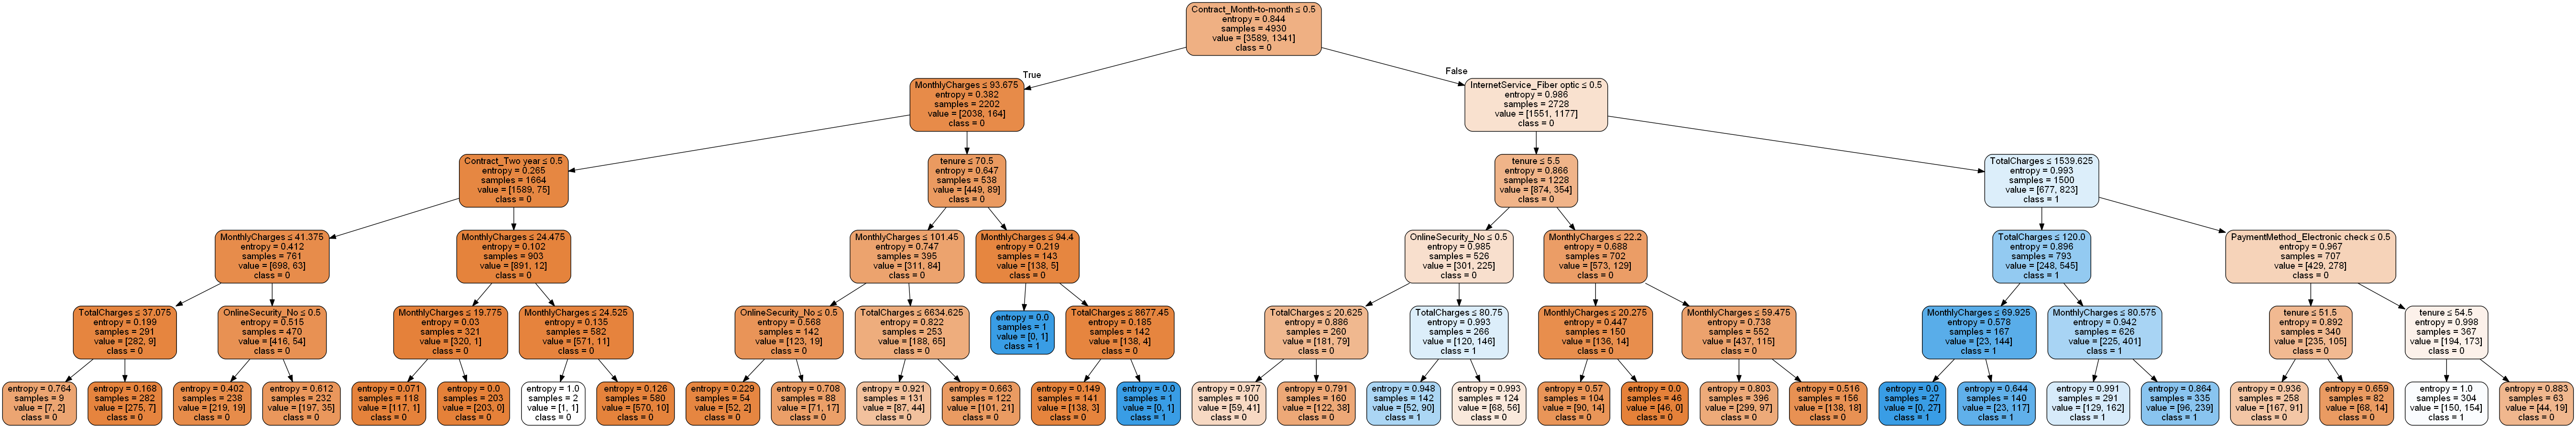

In [102]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('churnes.png')
Image(graph.create_png())

## From our confusion matrix we are able to observe that there are 1435 True Positves, 150 False positives, 264 False Negatives, 264 True negatives. Our model has properly classified a majority of  our cases. 

In [103]:
array = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array,columns=['True','False'],index=['Positive','Negative'])
df_cm

,True,False
Positive,1364,221
Negative,198,330


In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1585
           1       0.60      0.62      0.61       528

    accuracy                           0.80      2113
   macro avg       0.74      0.74      0.74      2113
weighted avg       0.80      0.80      0.80      2113



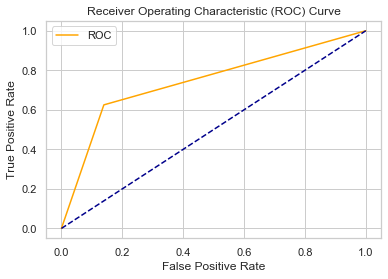

In [105]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [106]:
model = SelectFromModel(dt, prefit=True)
X_new = model.transform(X)
X_new.shape

(7043, 1)

In [107]:
dict = {'feature': X.columns, 'feature_importance':dt.feature_importances_}
new_df = pd.DataFrame(dict)
new_df.sort_values('feature_importance',axis=0,ascending=False,inplace=True)
features = [x for x in new_df['feature']]
new_df

,feature,feature_importance
6,Contract_Month-to-month,0.512897
2,TotalCharges,0.120554
3,InternetService_Fiber optic,0.111712
1,MonthlyCharges,0.106143
0,tenure,0.080583
7,Contract_Two year,0.029024
4,OnlineSecurity_No,0.027512
5,PaymentMethod_Electronic check,0.011575



<h1>This is a tag</h1>
<ul>
<li>Test</li>
</ul>